# Repaso L04 - LU

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# La funcion que calcula LU

def trisup(A,diag = True):
    m = A.shape[0]
    n = A.shape[1]
    ts = np.zeros((m,n))
    extra = (1 if not diag else 0)
    for i_fila in range(m):
        for j_columna in range(i_fila+extra,n):
            ts[i_fila,j_columna] = A[i_fila,j_columna]
    return ts

def triinf(A,diag = True):
    m = A.shape[0]
    n = A.shape[1]
    ts = np.zeros((m,n))
    extra = (1 if not diag else 0)
    for j_columna in range(n):
        for i_fila in range(j_columna+extra,m):
            ts[i_fila,j_columna] = A[i_fila,j_columna]
    return ts

def identidad(n):
    i = np.zeros((n,n))
    for j in range(n):
        i[j,j] = 1
    return i

def calculaLU(A,tol=1e-15):
    # Les queda a ustedes para completar con el suyo!
    return L, U, nops

def normaExacta(A,p):
    if p == 1:
        norma = 0
        for j in range(A.shape[1]):
            norma = max(norma,np.sum(np.abs(A[:,j])))
    elif p == 'inf':
        norma = 0
        for i in range(A.shape[0]):
            norma = max(norma,np.sum(np.abs(A[i,:])))
    else:
        norma = None
    return norma

def productoMatricial(A,B):
    return A@B


## Testeo del error

In [88]:
def test_error_random(lista_ns,intentos=100):
    resultado = [] # Aca guardamos los errores
    for n in n_lista:
        error_medio = 0 # Vamos a promediar sobre esta variable
        for _ in range(intentos): # Hacemos muchos intentos
            A = np.random.random((n,n)) # Generamos matrices al azar
            L,U,nops = calculaLU(A) # Calculamos la LU correspondiente
            if not L is None: # Si funciono la descomposicion
                error_medio += normaExacta(A-productoMatricial(L,U),'inf') # Agregamos el error al promedio
        error_medio /= intentos # dividimos sobre el total de intentos
        resultado.append(error_medio) # Guardamos el dato
    return(resultado)

n_lista = [2,3,5,10,20,30,50,100]
intentos = 300 # Correr con por ejemplo 50 para ver algo más rápidamente


errores_medios = test_error_random(n_lista,intentos)



Exponente: 2.9855354532106713


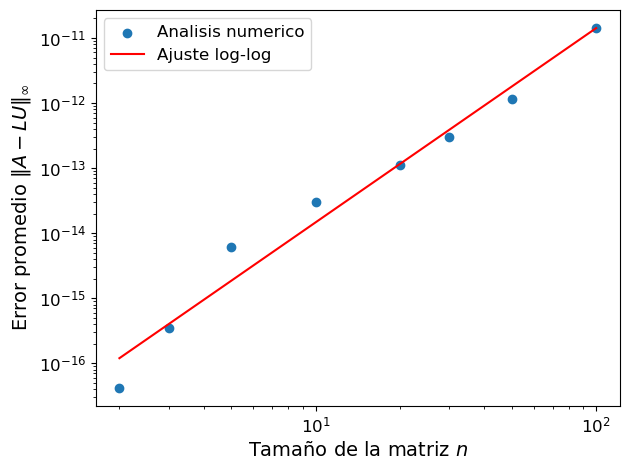

In [89]:
plt.scatter(n_lista,errores_medios,label='Analisis numerico')
plt.loglog()

coef = np.polyfit(np.log10(n_lista), np.log10(errores_medios),  1)   # devuelve [pendiente, intercepto]
pendiente, ordenada = coef

print("Exponente:", pendiente)
plt.plot(n_lista,10**ordenada * np.array(n_lista)**pendiente,label='Ajuste log-log',c='red')
plt.legend()

plt.xlabel('Tamaño de la matriz $n$', fontsize=14)
plt.ylabel(r'Error promedio $\|A - LU\|_{\infty}$', fontsize=14)

# Ticks y cuadrícula
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

Entonces, el error crece como $\approx n^{3}$. El error crece más rápido que la dimensión, haciendo que los errores "se disparen" en matrices grandes.

## Operaciones en función de $n$

In [ ]:
def Bn(n):
    B = np.zeros((n,n))
    for j_columna in range(n-1):
        B[j_columna:,j_columna] = np.array([1] + [-1]*(n-(j_columna+1)))
    B[:,n-1] = np.array([1]*n)
    return(B)

def test_Bn(lista_ns):
    normas = []
    operaciones = []
    for n in lista_ns:
        B = Bn(n)
        L,U,nops = calculaLU(B)
        normas.append( normaExacta(U,'inf') )
        operaciones.append( nops )
    return normas, operaciones


In [59]:
normas, operaciones = test_Bn(n_lista)

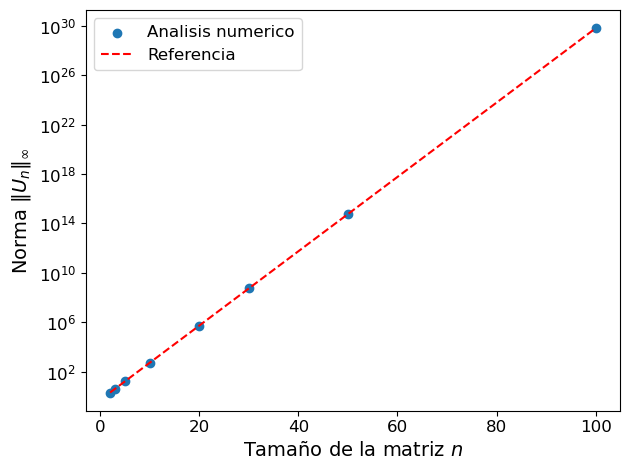

In [78]:
plt.scatter(n_lista,normas,label = 'Analisis numerico')

plt.plot(n_lista,[2**(n-1) for n in n_lista],label = 'Referencia',linestyle='--',c='red')

plt.yscale('log')
plt.xlabel('Tamaño de la matriz $n$', fontsize=14)
plt.ylabel(r'Norma $\|U_n\|_{\infty}$', fontsize=14)

# Ticks y cuadrícula
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

Exponente: 3.1247088412124087


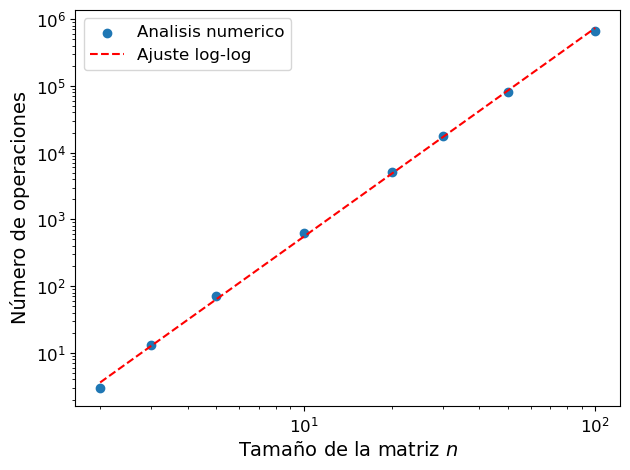

In [85]:
coef = np.polyfit(np.log10(n_lista), np.log10(operaciones),  1)   # devuelve [pendiente, intercepto]
pendiente, ordenada = coef

print('Exponente:',pendiente)

plt.scatter(n_lista,operaciones,label = 'Analisis numerico')
plt.plot(n_lista,10**ordenada * np.array(n_lista)**pendiente,label='Ajuste log-log',c='red',linestyle = '--')

plt.loglog()
plt.xlabel('Tamaño de la matriz $n$', fontsize=14)
plt.ylabel(r'Número de operaciones', fontsize=14)

# Ticks y cuadrícula
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Leyenda
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

De aquí podemos ver que el número de operaciones $N_o$ crece como $\approx n^3$. Entonces si $N_{o} \sim n^3$ y $error \sim n^{3}$, tendremos que $error \sim N_o$. Esto tiene sentido: básicamente, el error es proporcional a la cantidad de operaciones que estamos haciendo.

¡Les queda para checkear!